# *Predict the mass of the penguins based on bill_length, bill_depth and   flipper_length

In [1]:
pip install pandas matplotlib seaborn

In [2]:
import matplotlib.pyplot as plt
import pandas
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler

In [3]:
penguins_df = sns.load_dataset("penguins")

print(penguins_df.head())

# Remove the Nan
penguins = penguins_df.dropna()

print(penguins.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.

In [4]:
# Drop the column that you don't want to you use for the training

X = penguins[["bill_length_mm", "bill_depth_mm", "flipper_length_mm"]] # Caratteristiche
y = penguins["body_mass_g"] # Etichette che vuoi predirre

# Define the training and test samples
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, train_size=0.8, shuffle=True)

In [5]:
print(X_train, X_test, y_train, y_test)

     bill_length_mm  bill_depth_mm  flipper_length_mm
181            52.8           20.0              205.0
267            50.5           15.9              225.0
132            36.8           18.5              193.0
177            52.0           19.0              197.0
90             35.7           18.0              202.0
..              ...            ...                ...
68             35.9           16.6              190.0
261            49.6           16.0              225.0
277            45.5           15.0              220.0
42             36.0           18.5              186.0
21             37.7           18.7              180.0

[266 rows x 3 columns]      bill_length_mm  bill_depth_mm  flipper_length_mm
210            50.2           18.8              202.0
222            48.7           14.1              210.0
207            52.2           18.8              197.0
306            43.4           14.4              218.0
330            50.5           15.2              216.0
..  

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # Fit to data, then transform it. Fits transformer to X and y with optional parameters fit_params and returns a transformed version of X.
X_test = scaler.transform(X_test) # Perform standardization by centering and scaling.

In [8]:
# Create the model

model = keras.Sequential([
    keras.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1) ]) # Output: 1 class


# Compile the model
model.compile(optimizer="adam",
              loss="mse", # Mean squared error
              metrics=[keras.metrics.MeanAbsoluteError()] )

In [9]:
history = model.fit(X_train,
                    y_train,
                    epochs=200,
                    batch_size=10,
                    validation_data=(X_test, y_test))

Epoch 1/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 18811940.0000 - mean_absolute_error: 4250.1914 - val_loss: 19160154.0000 - val_mean_absolute_error: 4311.0596
Epoch 2/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 18246412.0000 - mean_absolute_error: 4188.9463 - val_loss: 19128982.0000 - val_mean_absolute_error: 4307.4712
Epoch 3/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 18456924.0000 - mean_absolute_error: 4216.8613 - val_loss: 19026732.0000 - val_mean_absolute_error: 4295.7373
Epoch 4/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 18260336.0000 - mean_absolute_error: 4188.7612 - val_loss: 18747044.0000 - val_mean_absolute_error: 4263.6152
Epoch 5/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 17233878.0000 - mean_absolute_error: 4078.0750 - val_loss: 18095758.0000 - val_mean_absolute_error: 4187.9771
Epoch 6/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 16432704.0000 - mean_absolute_error: 3974.5168 - val_loss: 16820202.0000 - val_mean_absolute_er

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 156762.4375 - mean_absolute_error: 320.4225
Mean Absolute Error: 315.66
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


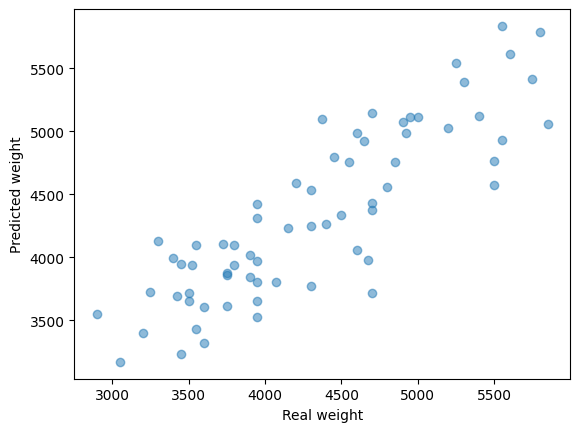

In [10]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Mean Absolute Error: {test_mae:.2f}")

# Fare previsioni
y_pred = model.predict(X_test)

# Visualizzare i risultati
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Real weight")
plt.ylabel("Predicted weight")
plt.title("")
plt.show()